# POSTTEST 5

Nama : Muhammad Akbar fahrezi 

NIM  : 2109106117

Informatika C1 21

#### Saya memilih classification dengan menggunakan Algoritma Support Vector Classifier dan KNN. Maka saya menampilkan score pendekatan

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.model_selection import train_test_split

## Info data

In [2]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [28]:
# Standarisasi
ssc = StandardScaler()
data[["age", "tenure", "products_number", "credit_card", "active_member"]] = ssc.fit_transform(
    data[["age", "tenure", "products_number", "credit_card", "active_member"]])

# Encoding
encoder = OrdinalEncoder()
data[["country"]]=encoder.fit_transform(data[["country"]])

## Split DataMelakukan Split data guna membagi data training dan test sebesar 70:30. data targetnya ialah churnnpe)

In [29]:
X = data[["country", "age", "tenure", "products_number", "credit_card", "active_member"]]
Y = data["churn"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [30]:
print("Dimensi X_train :", X_train.shape)
print("Dimensi X_test :", X_test.shape)
print("Dimensi Y_train :", Y_train.shape)
print("Dimensi Y_test :", Y_test.shape)

Dimensi X_train : (7000, 6)
Dimensi X_test : (3000, 6)
Dimensi Y_train : (7000,)
Dimensi Y_test : (3000,)


## Algoritma Support Vector Machine

In [31]:
from sklearn.svm import SVC

svm = SVC().fit(X_train, Y_train)
predict_svm = svm.predict(X_test)
print("Score Algoritma SVM : ", accuracy_score(Y_test, predict_svm)*100,"%")

Score Algoritma SVM :  85.93333333333332 %


## Evaluasi Hasil Prediksi menggunakan Confusion matrix

In [70]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, predict_svm))
print(classification_report(Y_test, predict_svm))

[[2321   58]
 [ 364  257]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2379
           1       0.82      0.41      0.55       621

    accuracy                           0.86      3000
   macro avg       0.84      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000



## Plot

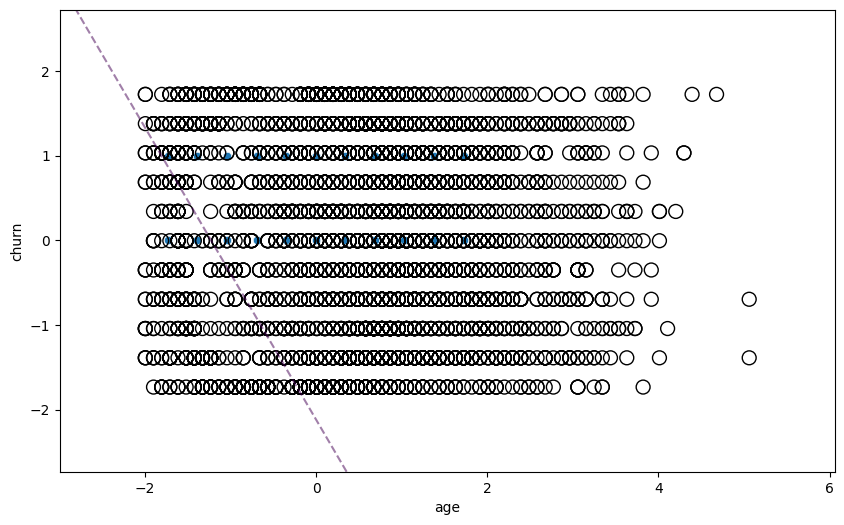

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='tenure', y='churn', data=data)

ax = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    estimator=svm,
    X=X,
    plot_method="contour",
    # colors="k", # untuk warna abu
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "--", "--"],
    ax=ax,
)

ax.scatter(
    svm.support_vectors_[:, 0],
    svm.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)

plt.xlabel('age')
plt.ylabel('churn')
plt.show()

## Algoritma K-Nearest Neighbor

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model_KNN = KNeighborsClassifier(n_neighbors = 6).fit(X_train, Y_train)

1. akurasi model KNN pada test set

In [88]:
model_KNN.score(X_test, Y_test)

0.846

2. akurasi model KNN pada Train set

In [90]:
model_KNN.score(X_train, Y_train)

0.8697142857142857

In [91]:
predict_KNN = model_KNN.predict(X_test)
print("Score Algoritma KNN : ", accuracy_score(Y_test, predict_KNN)*100,"%")

Score Algoritma KNN :  84.6 %


## K-Means Clustering (Unsupervised)

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

In [98]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [99]:
# Melakukan pengelompokan dari customer bank berdasarkan nilai kredit dan saldo pada rekening

df_subset = data[['credit_score','balance']]
ss = StandardScaler()
x_scaled = ss.fit_transform(df_subset)

print(x_scaled)

[[-0.32622142 -1.22584767]
 [-0.44003595  0.11735002]
 [-1.53679418  1.33305335]
 ...
 [ 0.60498839 -1.22584767]
 [ 1.25683526 -0.02260751]
 [ 1.46377078  0.85996499]]


In [100]:
model_kmeans = KMeans(n_clusters = 3)

model_kmeans.fit(x_scaled)

D:\Kuliah\praktikum_kecerdasan_buatan\venv_C1-21\Akbar_117\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [101]:
labels = model_kmeans.labels_

In [102]:
print(labels)

[1 0 0 ... 1 2 2]


## Buat Cross_tab untuk dibandingkan cluster nya

In [103]:
# Membuat dataframe dengan label dan Negara tempat tinggal sebagai kolom

df_kmeans = pd.DataFrame({'labels' : labels, 'negara' : data.country})

In [104]:
# Buat crosstab

crossTab = pd.crosstab(df_kmeans['labels'], df_kmeans['negara'])

In [105]:
print(crossTab)

negara  France  Germany  Spain
labels                        
0         1222     1224    614
1         2472       33   1223
2         1320     1252    640


In [106]:
plt.style.use('ggplot')

In [107]:
xs = x_scaled[:, 0]
ys = x_scaled[:, 1]

In [108]:
# Menampung koordinat dari semua centroid
centroids = model_kmeans.cluster_centers_

In [109]:
# Memisahkan centroid koordinat x dan koordinat y
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 1]

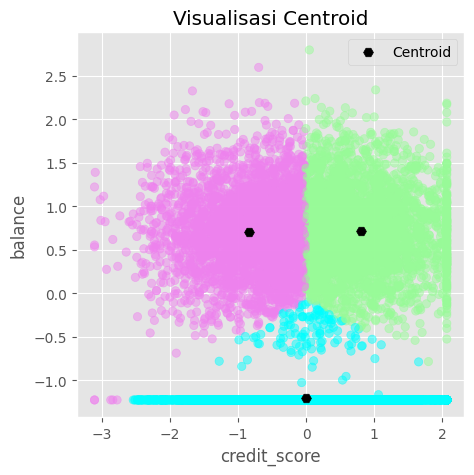

In [110]:
# Visualisasi Cluster
plt.figure(figsize=(5, 5))

colormap = np.array(['violet','cyan','palegreen'])

# Titik-titik data x dan y tiap cluster
plt.scatter(xs, ys, alpha=0.5, c = colormap[labels])

# Titik-titik centroid
plt.scatter(centroids_x, centroids_y, label = "Centroid", marker="H", color = "black", s=50)

# Beri Label
plt.title("Visualisasi Centroid")
plt.xlabel("credit_score")
plt.ylabel("balance")

plt.legend()
plt.show()